In [25]:
import os
import pandas as pd
import utils
import consts
from importlib import reload
reload(consts)
from consts import HS
import annotation
import dna_features_translator_class as dftc
from matplotlib import pyplot as plt
import seaborn as sns
from Bio import SeqIO

reload(annotation)
reload(utils)
reload(dftc)
plt.style.use('default')

PATH = os.getcwd()

In [26]:
import glob, re
hela = []
hela_names = []

for i in glob.glob(os.path.join(PATH, 'data', 'proseq', 'HS_HeLa_sarah', 'nuc_first', '*.csv')): 
    hela.append(pd.read_csv(i, index_col = 0))
    hela_names.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))

hela_2 = []
hela_names_2 = []
for i in glob.glob(os.path.join(PATH, 'data', 'proseq', 'HS_HeLa2_fix1_sarah', '*.csv')):
    hela_2.append(pd.read_csv(i, index_col = 0).fillna(0))
    hela_names_2.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))

u87 = []
u87_names = []
for i in glob.glob(os.path.join(PATH, 'data', 'proseq', 'HS_U87_sarah', 'nuc_first','*.csv')):
    u87.append(pd.read_csv(i, index_col = 0))
    u87_names.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))

d407 = []
d407_names = []
for i in glob.glob(os.path.join(PATH, 'data', 'proseq', 'HS_D407_sarah','nuc_first', '*.csv')):
    d407.append(pd.read_csv(i, index_col = 0))
    d407_names.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))

metadata = pd.read_excel(os.path.join(PATH, 'data', 'proseq', 'sarah_metadata', 'sample_summary.xlsx'), sheet_name = 'summary_table')



<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shtolz\AppData\Local\Temp\ipykernel_32692\191256248.py:7: SyntaxWarning: invalid escape sequence '\d'
  hela_names.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))
C:\Users\shtolz\AppData\Local\Temp\ipykernel_32692\191256248.py:13: SyntaxWarning: invalid escape sequence '\d'
  hela_names_2.append(re.sub(pattern = '_\d+_HS', repl = '', string = i).split('\\')[-1].replace('.csv', ''))
C:\Users\shtolz\AppData\Local\Temp\ipykernel_32692\191256248.py:19: SyntaxWarning: invalid escape sequence '\d'
  u87_names.append(re.sub(pattern = '_\d+

In [27]:

hela_time_course_names = [hela_names[0], hela_names[2], hela_names[5], hela_names[1]]
hela_time_course = [hela[0], hela[2], hela[5], hela[1]]

hela_old_names = [hela_names[3], hela_names[4], hela_names[6], hela_names[9]]
hela_old = [hela[3], hela[4], hela[6], hela[9]]

hela_rehyp_names = [hela_names[7], hela_names[8], hela_names[10], hela_names[11]]
hela_rehyp = [hela[7], hela[8], hela[10], hela[11]]

print(hela_time_course_names, hela_old_names, hela_rehyp_names)
print(hela_time_course[0][['Position','coverage']].head(2), hela_old[0][['Position','coverage']].head(2), hela_rehyp[0][['Position','coverage']].head(2))
print(u87_names)
print(d407_names)


for i in hela_time_course + hela_old + hela_rehyp + u87 + d407 :
    # Apply rolling window to pos and neg RPMs
    i['pos_RPM'] = i['pos_RPM'].rolling(window = 100, min_periods = 1).mean()
    i['neg_RPM'] = i['neg_RPM'].rolling(window = 100, min_periods = 1).mean()
    i['pos_scaled expression'] = i['pos_RPM'].apply(utils.scale_min_max, maxi = i['pos_RPM'].max(), mini = i['pos_RPM'].min(), multiply = 100)
    i['neg_scaled expression'] = i['neg_RPM'].apply(utils.scale_min_max, maxi = i['neg_RPM'].max(), mini = i['neg_RPM'].min(), multiply = 100)


hela_hyp_combined = pd.concat([hela[1], hela[9], hela[4]])
hela_hyp_combined_names = [hela_names[1], hela_names[9], hela_names[4]]
hela_ctrl_combined = pd.concat([hela[0], hela[3], hela[6]])
hela_ctrl_combined_names = [hela_names[0], hela_names[3], hela_names[6]]

u87_hyp_combined = pd.concat([u87[1], u87[3]])
u87_hyp_combined_names = [u87_names[1], u87_names[3]]
u87_ctrl_combined = pd.concat([u87[0], u87[2]])
u87_ctrl_combined_names = [u87_names[0], u87_names[2]]

d407_hyp_combined = pd.concat([d407[1], d407[3]])
d407_hyp_combined_names = [d407_names[1], d407_names[3]]
d407_ctrl_combined = pd.concat([d407[0], d407[2]])
d407_ctrl_combined_names = [d407_names[0], d407_names[2]]



['0-cont', '2hr-hypox', '6hr-hypox', '24hr-hypox'] ['3HCa', '4HHa', 'H1-control', 'H3a'] ['H1n', 'H2n', 'O1n', 'O2n']
   Position  coverage
0         1       523
1         2       522    Position  coverage
0         1      1696
1         2      1704    Position  coverage
0         1      2263
1         2      2301
['3-AC', '4-AH', '5-BC', '7-BH', 'sAC', 'sAH', 'sBC', 'sBH']
['1DC', '2DH', 'D1-control', 'D3B']


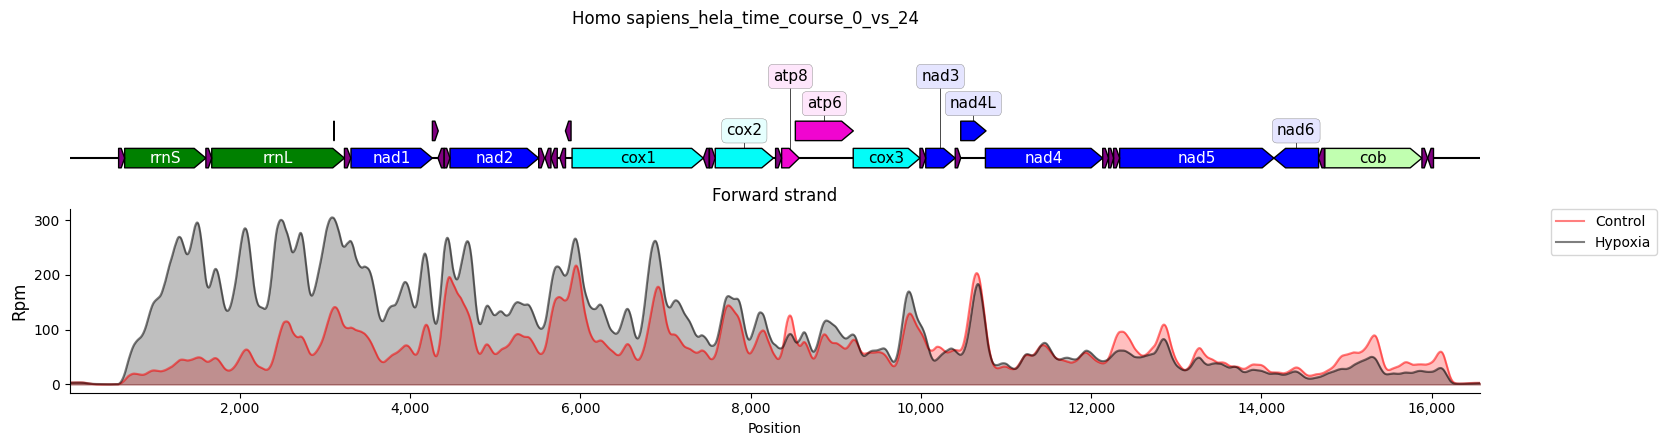

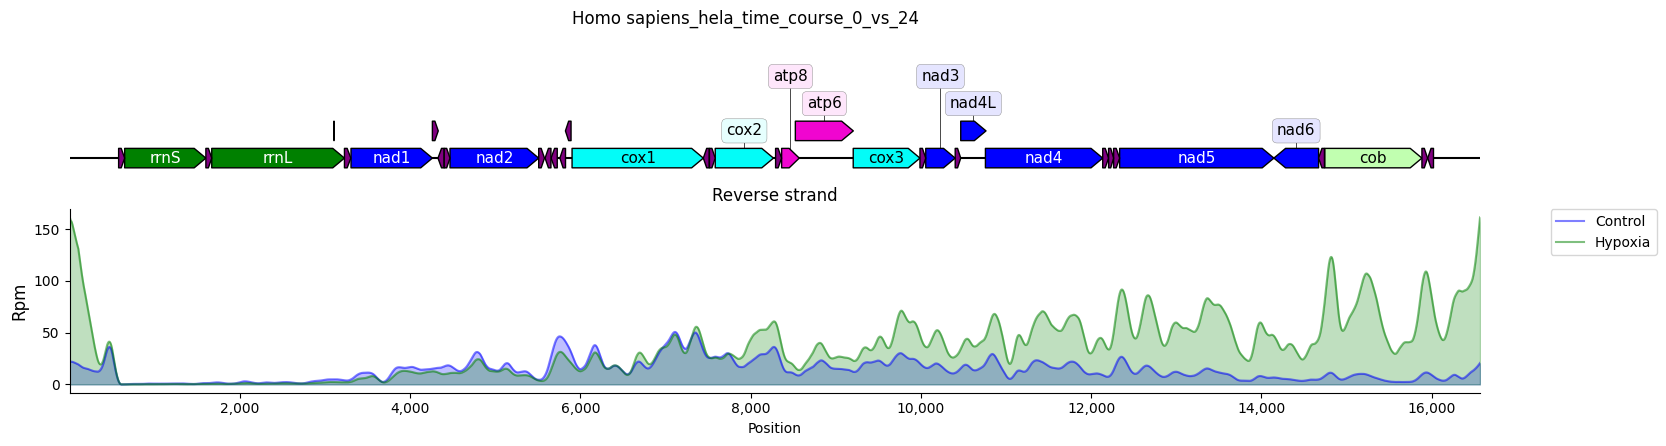

In [29]:
reload(dftc)

dftc.coverage_graph(org = HS, sample = hela_time_course[0], addit_samples = hela_time_course[-1], labels = ['Control', 'Hypoxia'], strand = 'both', plotlist = ['RPM'], alpha = .5, log = False, upscaling = 1.5, fill = True, savefig = os.path.join(PATH, 'figures', 'HS_hela_time_course_0_vs_24_big.png'), custom_title='hela_time_course_0_vs_24', legend_outside= True)

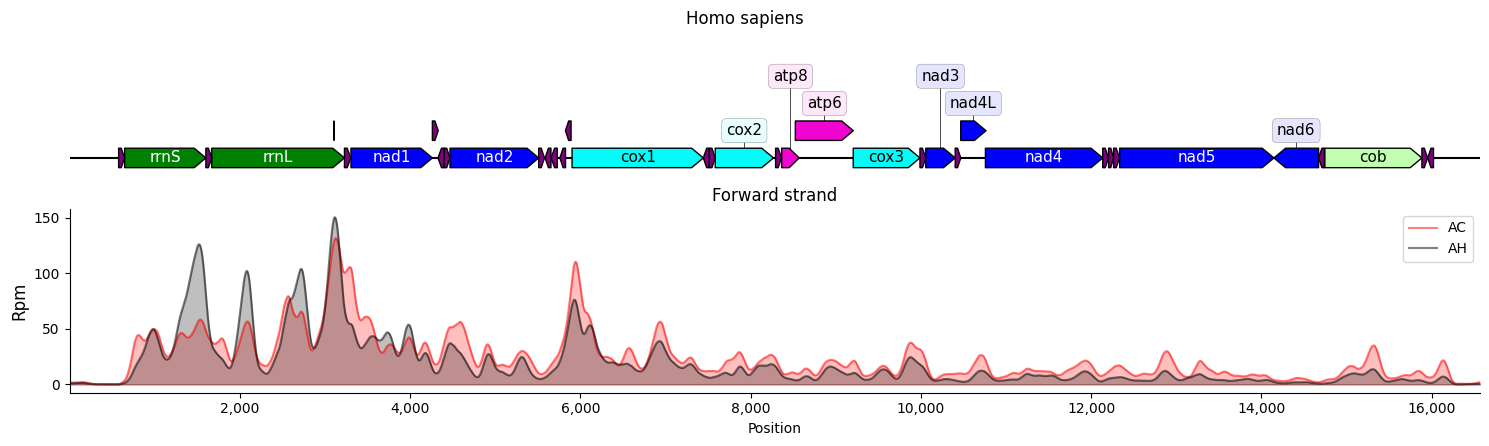

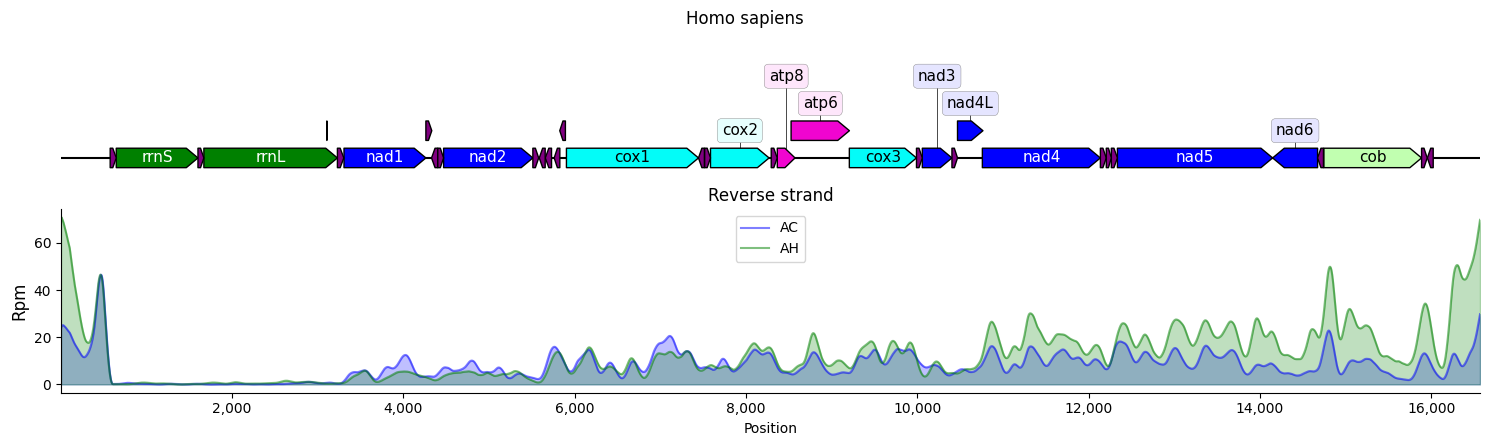

In [30]:
dftc.coverage_graph(org = HS,window = 100, sample = u87[4], addit_samples = u87[5], labels = ['AC', 'AH'], strand = 'both', plotlist = ['RPM'], alpha = .5, log = False, upscaling = 1.5, fill = True)